In [1]:
!pip install tensorflow

In [2]:
import numpy as np # used for Converting data to formats suitable for machine learning models
import tensorflow as tf #  is an open-source deep learning framework developed by Google. which is used Building, training, and evaluating deep learning models
from tensorflow import keras # is a high-level API built on top of TensorFlow
from matplotlib import pyplot as plt # Matplotlib is used for visualization 
import seaborn as sn # seaborn is also used for visualization

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # This loads the MNIST dataset and returns a tuple

In [4]:
x_train.shape # this shows the  NumPy array shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
x_train = x_train/255
x_test = x_test/255

5


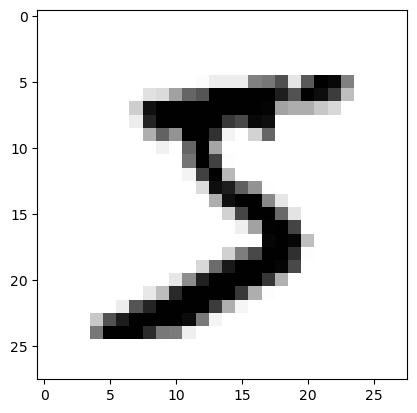

In [9]:
index = 0
plt.imshow(x_train[index], cmap = plt.cm.binary)
print(y_train[index])

0


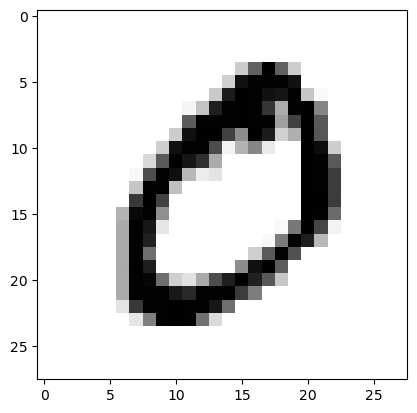

In [10]:
index = 1
plt.imshow(x_train[index], cmap = plt.cm.binary)
print(y_train[index])

4


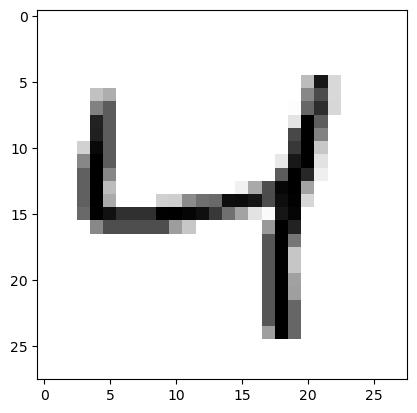

In [11]:
index = 2
plt.imshow(x_train[index], cmap = plt.cm.binary)
print(y_train[index])

In [12]:
x_train_flat = x_train.reshape(len(x_train),(28 * 28))
x_test_flat = x_test.reshape(len(x_test),(28 * 28))

In [13]:
x_train_flat.shape

(60000, 784)

In [14]:
model = keras.Sequential((
    keras.layers.Dense(128, input_shape = (784,) , activation = 'relu'),
    keras.layers.Dense(64, activation = 'sigmoid'),
    keras.layers.Dense(32, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax'),
))

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
               )
model.fit(x_train_flat, y_train, epochs = 5)

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7997 - loss: 0.8978
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9629 - loss: 0.1375
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9751 - loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9815 - loss: 0.0648
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9875 - loss: 0.0443


In [15]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9679 - loss: 0.1050


[0.09501433372497559, 0.9718999862670898]

In [16]:
y_pred = model.predict(x_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Axes: >

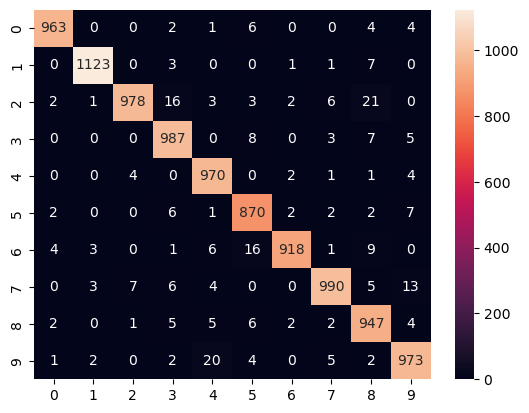

In [17]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
sn.heatmap(confusion_matrix, annot = True , fmt = 'd')